In [31]:
#1
#1a
import pandas as pd
data = pd.read_csv('GlobalLandTemperaturesByState.csv')
filtered_data = data[['dt', 'AverageTemperature', 'State']]
data['Year'] = data['dt'].str[:4].astype(int)
filtered_data = filtered_data[data['Year'] > 2000]
filtered_data = filtered_data[(filtered_data['State'] == 'Wyoming') | (filtered_data['State'] == 'Nebraska') | (filtered_data['State'] == 'South Dakota')]
print(filtered_data)

                dt  AverageTemperature     State
350773  2001-01-01              -2.592  Nebraska
350774  2001-02-01              -5.575  Nebraska
350775  2001-03-01               2.077  Nebraska
350776  2001-04-01              10.431  Nebraska
350777  2001-05-01              15.878  Nebraska
...            ...                 ...       ...
626435  2013-05-01              10.607   Wyoming
626436  2013-06-01              16.267   Wyoming
626437  2013-07-01              20.222   Wyoming
626438  2013-08-01              19.621   Wyoming
626439  2013-09-01              15.811   Wyoming

[459 rows x 3 columns]


In [32]:
#1b
import pandas as pd

states = ['Nebraska', 'South Dakota', 'Wyoming']
filtered_data = filtered_data[filtered_data['State'].isin(states)]

filtered_data['dt'] = pd.to_datetime(filtered_data['dt'])

daily_avg_temp = (filtered_data.groupby('dt')['AverageTemperature'].mean().reset_index().rename(columns={'AverageTemperature': 'DailyAverageTemperature'}))

print(daily_avg_temp)


            dt  DailyAverageTemperature
0   2001-01-01                -4.480333
1   2001-02-01                -7.541000
2   2001-03-01                 0.590333
3   2001-04-01                 7.889000
4   2001-05-01                13.908667
..         ...                      ...
148 2013-05-01                13.196000
149 2013-06-01                18.783667
150 2013-07-01                22.110333
151 2013-08-01                21.890000
152 2013-09-01                18.953000

[153 rows x 2 columns]


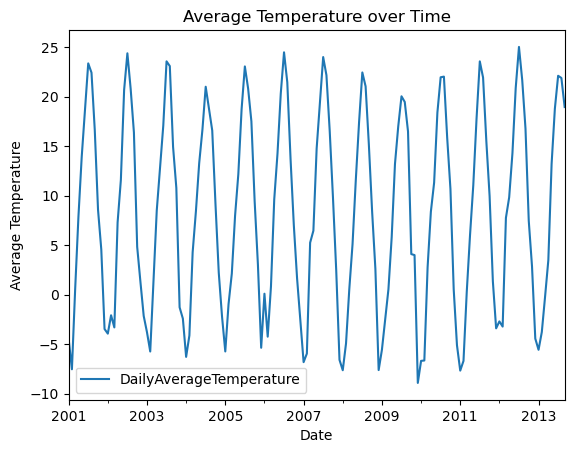

In [33]:
#1c
import pandas as pd
import matplotlib.pyplot as plt

daily_avg_temp.plot(x='dt', y='DailyAverageTemperature', title='Average Temperature over Time', xlabel = 'Date', ylabel='Average Temperature')
plt.show()

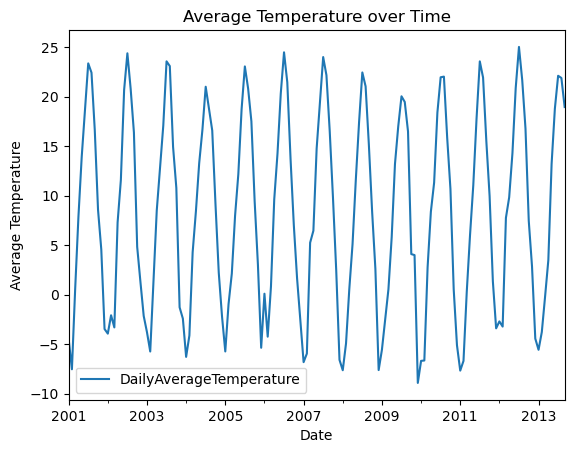

In [34]:
#1d
import pandas as pd
import matplotlib.pyplot as plt

daily_avg_temp['dt'] = pd.to_datetime(daily_avg_temp['dt'])
daily_avg_temp['NumericalDate'] = (daily_avg_temp['dt'] - pd.Timestamp('2001-01-01')) / pd.Timedelta(days=1)
daily_avg_temp.plot(x='dt', y='DailyAverageTemperature', title='Average Temperature over Time', xlabel = 'Date', ylabel='Average Temperature')
plt.show()

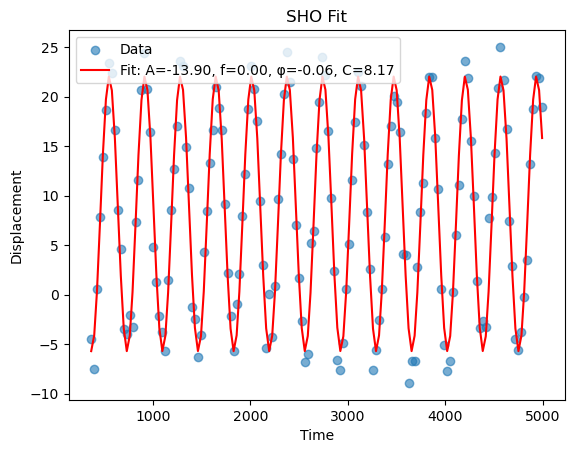

In [36]:
#1e
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def fit(x, A, f, phi, C):
    return A * np.cos(2 * np.pi * f * x + phi) + C

daily_avg_temp['dt'] = pd.to_datetime(daily_avg_temp['dt'])
daily_avg_temp['NumericalDate'] = (daily_avg_temp['dt'] - pd.Timestamp('2000-01-01')) / pd.Timedelta(days=1)

x_data = daily_avg_temp['NumericalDate'].to_numpy()
y_data = daily_avg_temp['DailyAverageTemperature'].to_numpy()

A_guess = 15
f_guess = 1/365
phi_guess = 0
C_guess = np.mean(y_data)

initial_guess = [A_guess, f_guess, phi_guess, C_guess]

params, covariance = curve_fit(fit, x_data, y_data, p0=initial_guess)

A_fit, f_fit, phi_fit, C_fit = params

y_fit = fit(x_data, A_fit, f_fit, phi_fit, C_fit)

plt.scatter(x_data, y_data, label='Data', alpha=0.6)
plt.plot(x_data, y_fit, label=f'Fit: A={A_fit:.2f}, f={f_fit:.2f}, φ={phi_fit:.2f}, C={C_fit:.2f}', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('SHO Fit')
plt.show()

In [37]:
#1h
A_Error = (covariance[0,0])**(1/2)
f_Error = (covariance[1,1])**(1/2)
phi_Error = (covariance[2,2])**(1/2)
C_Error = (covariance[3,3])**(1/2)
print(A_Error)
print(f_Error)
print(phi_Error)
print(C_Error)

0.22650022615517337
1.9558479306817743e-06
0.03677942121977209
0.16069847138838222


In [38]:
#1i
print("Fitted Amplitude is", A_fit, "with an error of", A_Error)
print("Fitted Amplitude is", f_fit, "with an error of", f_Error)
print("Fitted Amplitude is",phi_fit, "with an error of", phi_Error)
print("Fitted Amplitude is",C_fit, "with an error of", C_Error)

Fitted Amplitude is -13.898335741924443 with an error of 0.22650022615517337
Fitted Amplitude is 0.0027377198867890662 with an error of 1.9558479306817743e-06
Fitted Amplitude is -0.059095562680277706 with an error of 0.03677942121977209
Fitted Amplitude is 8.174924014799121 with an error of 0.16069847138838222


In [39]:
#2
import random

lower_bound = 0
upper_bound = 200 

list_1 = []
list_2 = []
list_3 = []

x = 0

while x < 50:
    random_integer1 = random.randint(lower_bound, upper_bound)
    random_integer2 = random.randint(lower_bound, upper_bound)
    random_integer3 = random.randint(lower_bound, upper_bound)
    x = x + 1
    list_1.append(random_integer1)
    list_2.append(random_integer2)
    list_3.append(random_integer3)
    
x_axis = []
y = 0
while y < 50:
    x_axis.append(y)
    y = y + 1

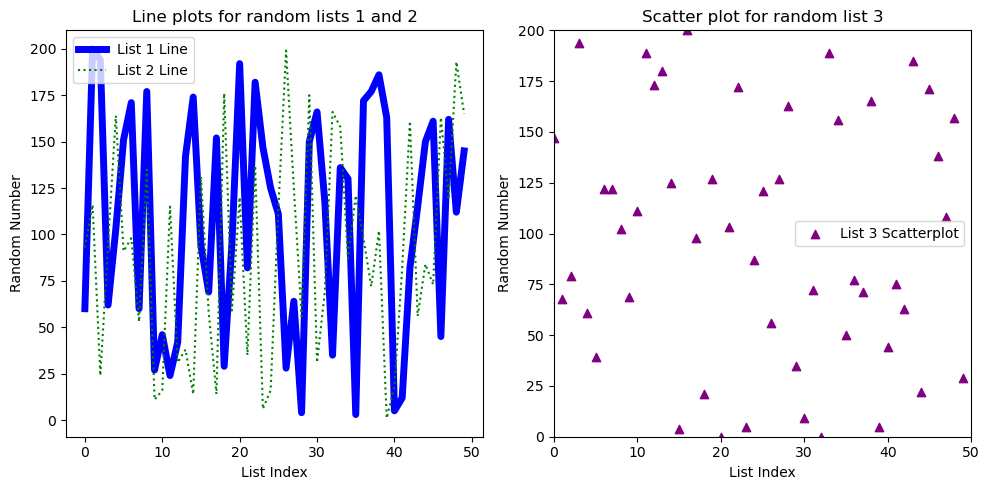

In [40]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

axes[0].plot(x_axis, list_1, color = 'blue', linewidth = '5', label='List 1 Line')
axes[0].plot(x_axis, list_2, color = 'green', linestyle = ':', label='List 2 Line')
axes[1].scatter(x_axis, list_3, color = 'purple', marker='^', label='List 3 Scatterplot')
axes[0].legend()
axes[1].legend()
axes[0].set_title('Line plots for random lists 1 and 2')
axes[1].set_title('Scatter plot for random list 3')
axes[0].set_xlabel('List Index')
axes[0].set_ylabel('Random Number')
axes[1].set_xlabel('List Index')
axes[1].set_ylabel('Random Number')
plt.xlim(0, 50)
plt.ylim(0, 200)
plt.tight_layout()
plt.show()

For 10 trials, the value of pi is 2.8
For 1000 trials, the value of pi is 3.172


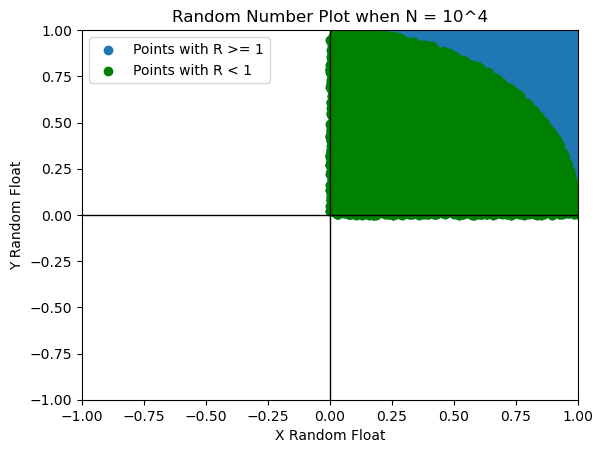

For 10000 trials, the value of pi is 3.1236
For 100000 trials, the value of pi is 3.1434
For 1000000 trials, the value of pi is 3.139872


In [79]:
#3
x = 0
list_1 = []
list_2 = []
N_list = [10, 1000, 10000, 100000, 1000000]
total = interior_counter + exterior_counter
x_interior_list = []
y_interior_list = []

for number in N_list:
    while x < number:
        x_random_float = random.random()
        y_random_float = random.random()
        x = x + 1
        list_1.append(x_random_float)
        list_2.append(y_random_float)
        
    interior_counter = 0
    exterior_counter = 0
    
    for num1, num2 in zip(list_1, list_2):
        if (num1**2 + num2**2)**0.5 < 1:
            interior_counter += 1
            x_interior_list.append(num1)
            y_interior_list.append(num2)
        else:
            exterior_counter += 1

    if(number == 10000):
        plt.axhline(0, color='black', linewidth=1)
        plt.axvline(0, color='black', linewidth=1)
        plt.scatter(list_1, list_2, label = 'Points with R >= 1')
        plt.scatter(x_interior_list, y_interior_list, color = 'green', label = 'Points with R < 1')
        plt.title('Random Number Plot when N = 10^4')
        plt.xlabel('X Random Float')
        plt.ylabel('Y Random Float')
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        plt.legend()
        plt.show()
        
    pi = 4 * (interior_counter / (interior_counter + exterior_counter)) #Instructions forgot to mention to multiply by 4
    print("For", number, "trials, the value of pi is", pi)
#When N gets bigger, the value of pi becomes more accurate
